In [ ]:
# Installation des librairies
!pip install tensorflow-gpu==2.9.0 tensorflow==2.9.0 gym-anytrading gym git+https://github.com/DLR-RM/stable-baselines3 finta shimmy quantstats

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/DLR-RM/stable-baselines3 to /tmp/pip-req-build-q6oxgs3m
  Running command git clone --filter=blob:none --quiet https://github.com/DLR-RM/stable-baselines3 /tmp/pip-req-build-q6oxgs3m
  Resolved https://github.com/DLR-RM/stable-baselines3 to commit 472ff8edb815070c405da913dcbe64c1a06e0e7d
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.0/172.0 kB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 74.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
# Importation des librairies
import gym
import gym_anytrading
from gym_anytrading.envs import StocksEnv
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3 import A2C
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from gym_anytrading.envs import StocksEnv
from finta import TA
import quantstats as qs

/usr/local/lib/python3.10/dist-packages/torch/utils/tensorboard/__init__.py:4: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if not hasattr(tensorboard, "__version__") or LooseVersion(


In [ ]:
# Importation des données
df = pd.read_csv('APPLE.csv')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 755 entries, 0 to 754
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   755 non-null    int64  
 1   Date    755 non-null    object 
 2   Open    755 non-null    float64
 3   High    755 non-null    float64
 4   Low     755 non-null    float64
 5   Close   755 non-null    float64
 6   Volume  755 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 41.4+ KB


In [ ]:
# Transformation des données
df.drop('index', inplace=True, axis=1)
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values('Date', ascending=True, inplace=True)
df.set_index('Date', inplace=True)
df['Volume'] = df['Volume'].apply(lambda x: x.replace('"', ""))
df['Volume'] = df['Volume'].apply(lambda x: float(x.replace(",", "")))

In [ ]:
df.info()
df.shape
df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 755 entries, 2020-06-19 to 2023-06-20
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    755 non-null    float64
 1   High    755 non-null    float64
 2   Low     755 non-null    float64
 3   Close   755 non-null    float64
 4   Volume  755 non-null    float64
dtypes: float64(5)
memory usage: 35.4 KB


,Open,High,Low,Close,Volume
Date,,,,,
2020-06-19,88.66,89.14,86.29,87.43,264475812.0
2020-06-22,87.84,89.87,87.79,89.72,135445280.0
2020-06-23,91.00,93.10,90.57,91.63,212155484.0
2020-06-24,91.25,92.20,89.63,90.02,192623392.0
2020-06-25,90.18,91.25,89.39,91.21,137522532.0


In [ ]:
# Creation de l'env
env = gym.make('stocks-v0', df=df, frame_bound=(16,755), window_size=5)
env.action_space

/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:31: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use a custom policy to properly process the data. Actual observation shape: (5, 2)
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


Discrete(2)

/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:190: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `return_info` to return information from the environment resetting.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:195: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `options` to allow the environment initialisation to be passed additional information.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:227: DeprecationWarning: WARN: Core environment is written in old step API which returns one bool instead of two. It is recommended to rewrite the envir

info {'total_reward': -20.880000000000067, 'total_profit': 0.049530296161723435, 'position': 0}


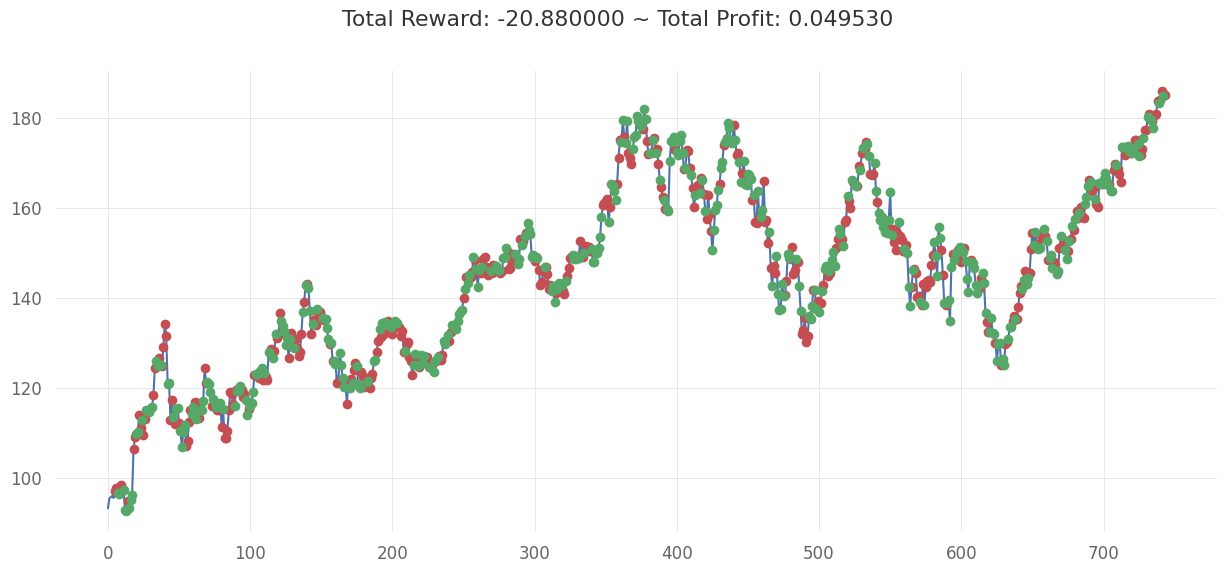

In [ ]:
# l'env
state = env.reset()
while True:
    action = env.action_space.sample()
    n_state, reward, done, info = env.step(action)
    if done:
        print("info", info)
        break

plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

Les indicateurs economiques sont importants pour prendre des actions d'inverstissement, On va utiliser 3 indicateurs :
SMA : C'est une moyenne mobile qui aide à identifier les tendances et les niveaux de support/résistance.
Indice de force relative (RSI) : Le RSI mesure la force et la dynamique des mouvements de prix. Il peut indiquer des conditions de surachat ou de survente, ainsi que des retournements de tendance potentiels ou des poursuites de tendance.
OBV : Le concept de l'On-Balance Volume repose sur le fait que le volume peut fournir des informations précieuses sur le sentiment du marché et la force des tendances de prix. L'OBV aide les traders et les analystes à évaluer s'il y a une pression d'achat nette ou une pression de vente nette sur le marché.

In [ ]:
# Indicateurs economiques
df['SMA'] = TA.SMA(df, 12)
df['RSI'] = TA.RSI(df)
df['OBV'] = TA.OBV(df)
df.fillna(0, inplace=True)

In [ ]:
# Creation de nouveau env
def add_signals(env):
    start = env.frame_bound[0] - env.window_size
    end = env.frame_bound[1]
    prices = env.df.loc[:, 'Low'].to_numpy()[start:end]
    signal_features = env.df.loc[:, ['Low', 'Volume','SMA', 'RSI', 'OBV']].to_numpy()[start:end]
    return prices, signal_features

In [ ]:
class MyCustomEnv(StocksEnv):
    _process_data = add_signals

env2 = MyCustomEnv(df=df, window_size=5, frame_bound=(16,750))

In [ ]:
# Creation d'un env et entrainement
env_maker = lambda: env2
env = DummyVecEnv([env_maker])

/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


In [ ]:
model = A2C("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=1000000)

Using cuda device
------------------------------------
| time/                 |          |
|    fps                | 405      |
|    iterations         | 100      |
|    time_elapsed       | 1        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -0.691   |
|    explained_variance | 0.172    |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | 0.396    |
|    value_loss         | 5.77     |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 375      |
|    iterations         | 200      |
|    time_elapsed       | 2        |
|    total_timesteps    | 1000     |
| train/                |          |
|    entropy_loss       | -0.679   |
|    explained_variance | 1.19e-07 |
|    learning_rate      | 0.0007   |
|    n_updates          | 199      |
|    policy_loss        | 0.398    |
|    value_loss     

In [ ]:
env = MyCustomEnv(df=df, window_size=5, frame_bound=(746,755))
obs = env.reset()
while True:
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break

info {'total_reward': 4.97999999999999, 'total_profit': 1.0126931252113152, 'position': 0}


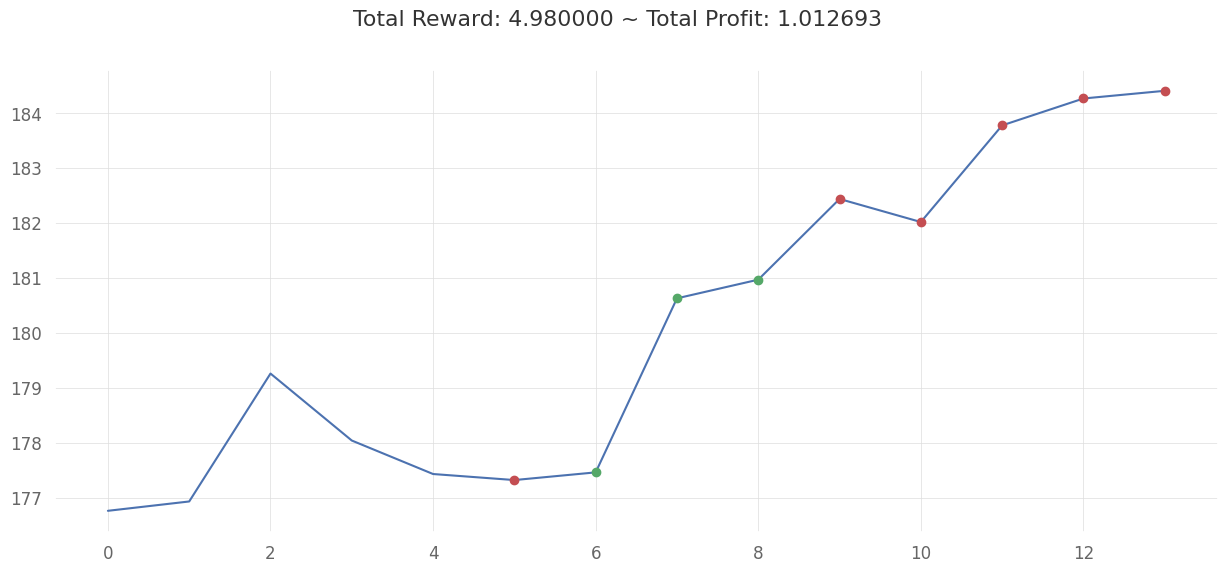

In [ ]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

On a eu un profit de 1.2693 % dans deux semaines. Ce qui un profit raisonnable pour les actions de Apple.
Si on utilise ce model pendant une année on va obtenir un profit de 38.81 % .
Selon les données du marché des actions ce profit est trés important.

[Performance Metrics]



/usr/local/lib/python3.10/dist-packages/scipy/stats/_distn_infrastructure.py:2351: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/usr/local/lib/python3.10/dist-packages/scipy/stats/_distn_infrastructure.py:2352: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


                           Strategy
-------------------------  ----------
Start Period               2023-06-09
End Period                 2023-06-20
Risk-Free Rate             0.0%
Time in Market             15.0%

Cumulative Return          1.27%
CAGR﹪                     0.11%

Sharpe                     6.0
Prob. Sharpe Ratio         97.72%
Smart Sharpe               5.05
Sortino                    -
Smart Sortino              -
Sortino/√2                 -
Smart Sortino/√2           -
Omega                      -

Max Drawdown               %
Longest DD Days            -
Volatility (ann.)          7.62%
Calmar                     -
Skew                       2.65
Kurtosis                   7.0

Expected Daily %           0.18%
Expected Monthly %         1.27%
Expected Yearly %          1.27%
Kelly Criterion            -
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.61%
Expected Shortfall (cVaR)  -0.61%

Max Consecutive Wins       1
Max Consecutive Losses     0
Gain

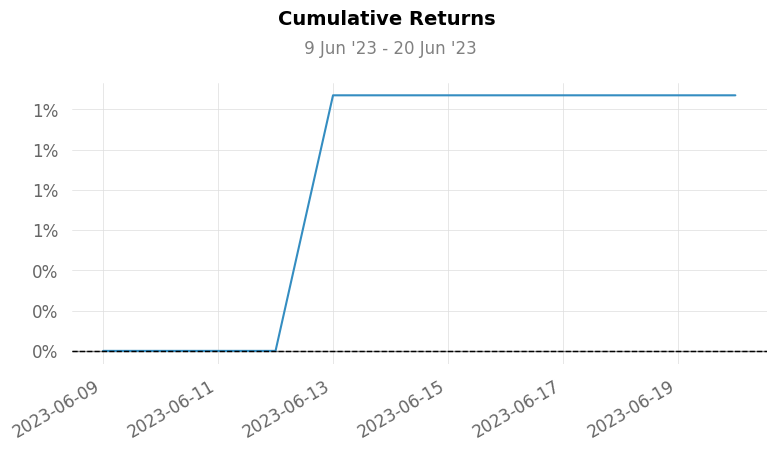

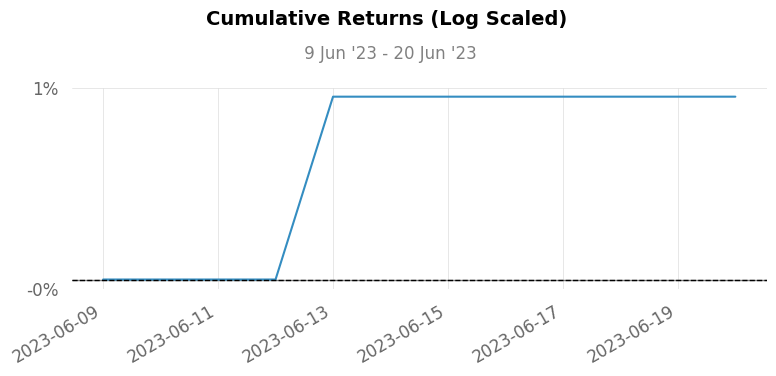

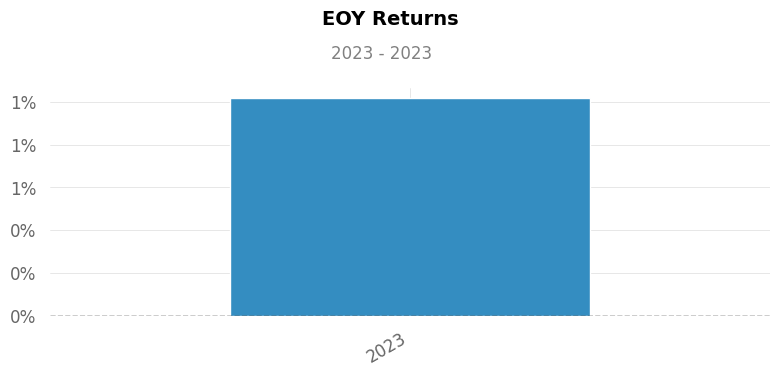

/usr/local/lib/python3.10/dist-packages/quantstats/_plotting/core.py:516: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  _sns.kdeplot(data=combined_returns, color="black", ax=ax)


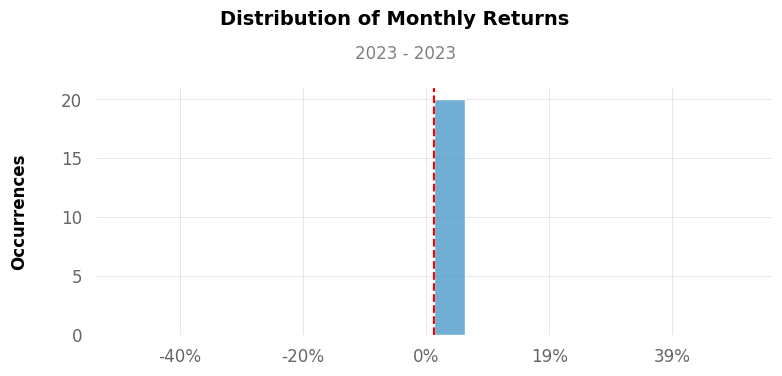

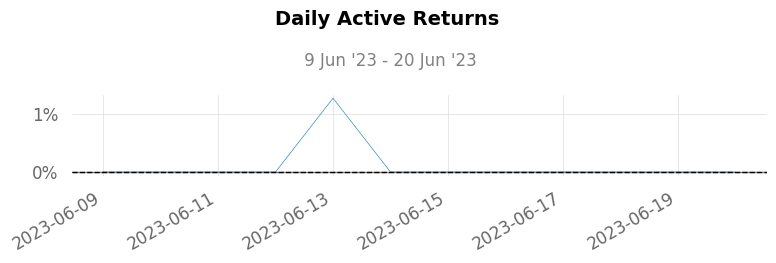

IndexError: ignored

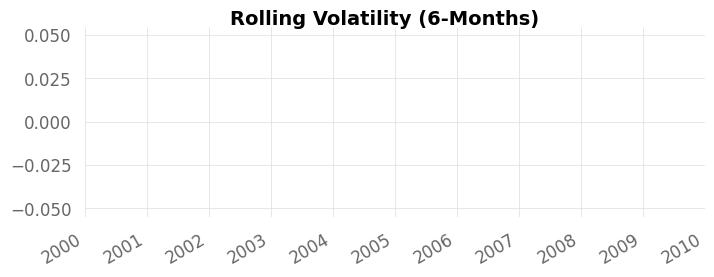

In [ ]:
qs.extend_pandas()

net_worth = pd.Series(env.history['total_profit'], index=df.index[747:755])
returns = net_worth.pct_change().iloc[1:]

qs.reports.full(returns)